In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
5,2020-03-30,France,43022.0,40174.0,2715.0,2606.0,2848.0,109.0
6,2020-03-30,China,82601.0,82463.0,3308.0,3311.0,138.0,-3.0
7,2020-03-30,Italy,99266.0,97689.0,11095.0,10781.0,1577.0,314.0
8,2020-03-30,Spain,81599.0,78797.0,6594.0,6528.0,2802.0,66.0
9,2020-03-30,United States,148230.0,143025.0,2840.0,2509.0,5205.0,331.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2052.5675675675675
RMSE =  3583.705182885143


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  264.9594594594595
RMSE =  519.0390419101699


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f1 = plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(15,5))
    ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  8969.0
RMSE =  9957.112809444312
-- World performances for deaths --
MAPE =  1370.75
RMSE =  1612.815007990687


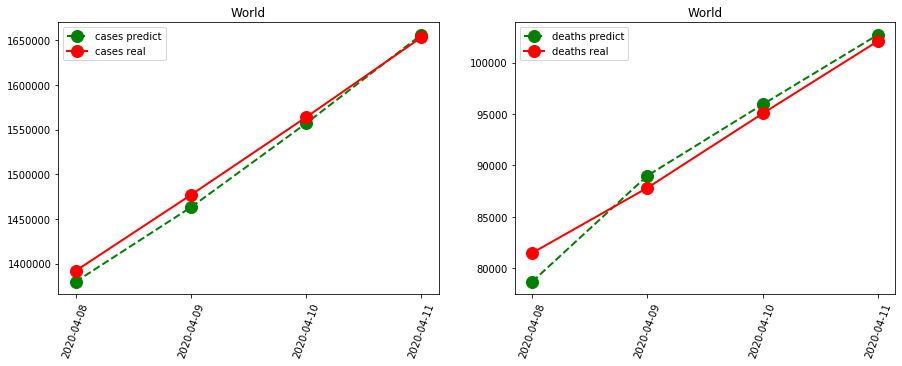

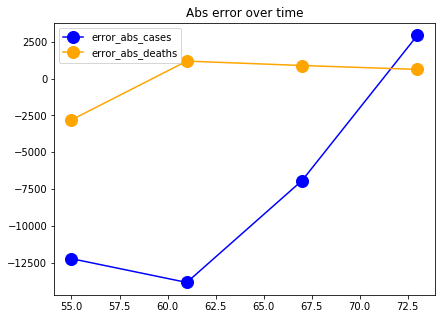

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  1957.642857142857
RMSE =  2755.1607290423444
-- France performances for deaths --
MAPE =  518.5714285714286
RMSE =  735.388721309058


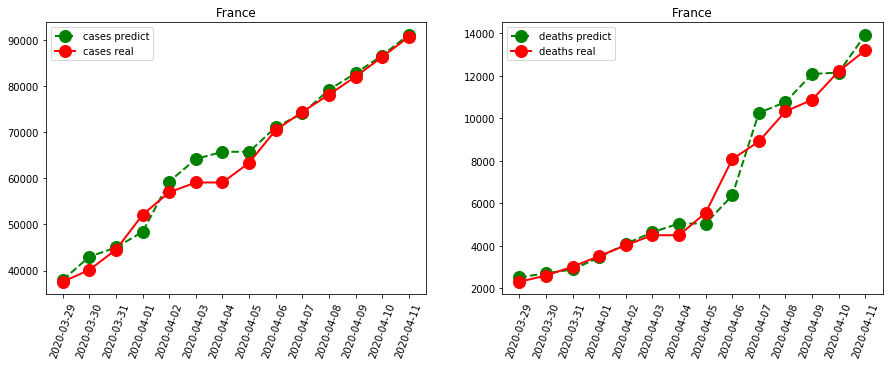

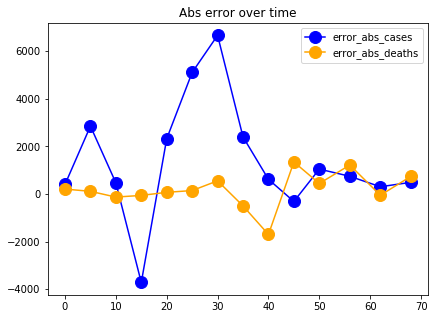

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  856.2142857142857
RMSE =  1030.250489652187
-- Italy performances for deaths --
MAPE =  103.92857142857143
RMSE =  130.1699438646045


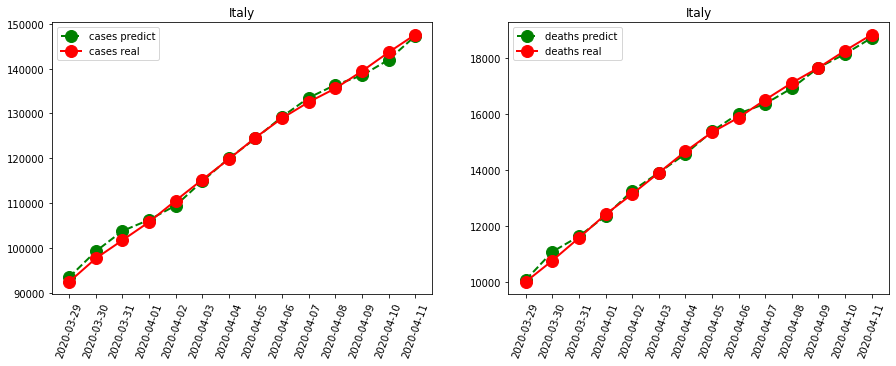

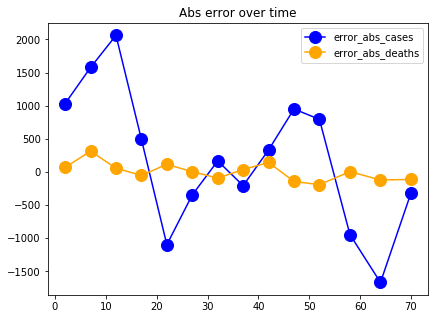

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1649.7142857142858
RMSE =  2100.4298539652714
-- Spain performances for deaths --
MAPE =  129.35714285714286
RMSE =  157.7341796459202


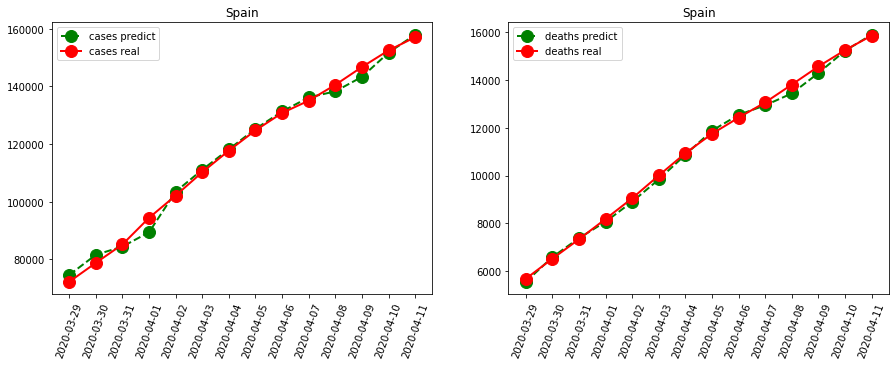

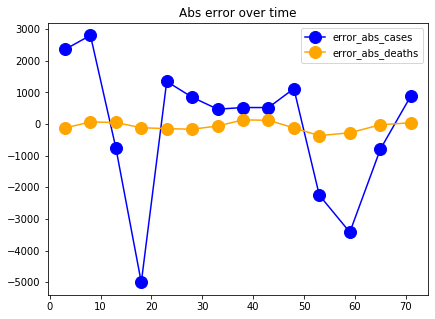

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  3673.5714285714284
RMSE =  5144.146132116722
-- United States performances for deaths --
MAPE =  254.21428571428572
RMSE =  313.29230987780636


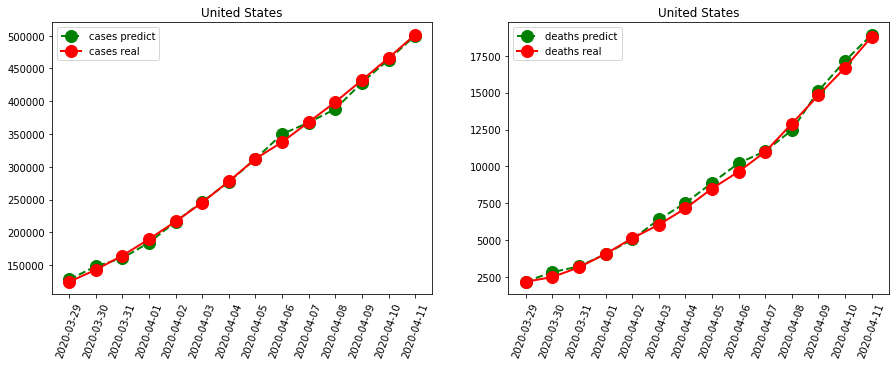

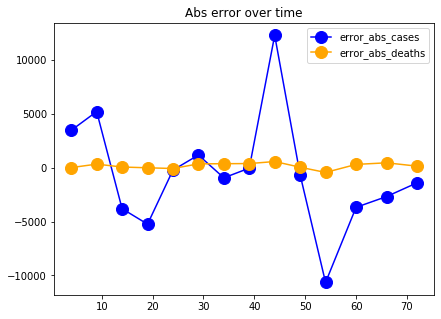

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  149.57142857142858
RMSE =  175.69941865096115
-- China performances for deaths --
MAPE =  2.7857142857142856
RMSE =  3.8078865529319543


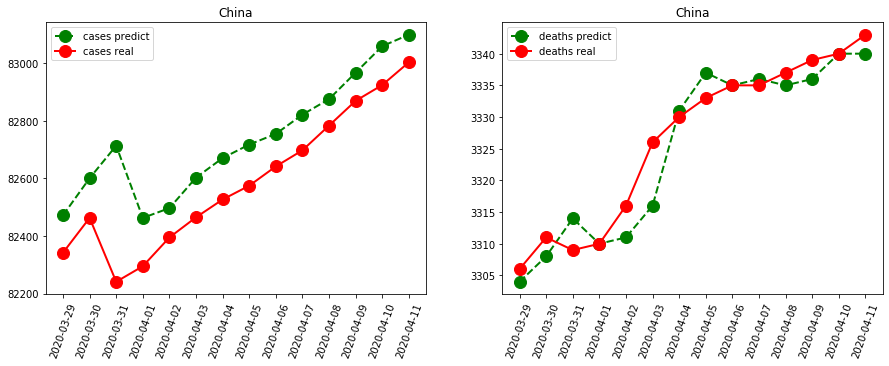

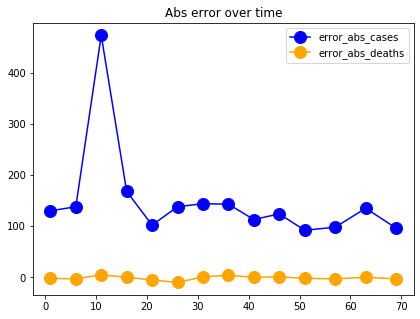

In [12]:
visShow("China")

In [13]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")